# Data Loading Options
This notebook showcases a few different methods of obtaining and loading training data. This can be utilised to test a developed model against differing data sources to test if it avoids overfitting. The model will need to be re-trained for each new data source.

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential

import pathlib
import numpy as np
import os
import PIL

import matplotlib.pyplot as plt
%matplotlib inline

## Option 1: Pre-built into libraries (CIFAR-10)

In [17]:
# CIFAR-10 dataset is included in tensorflow
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

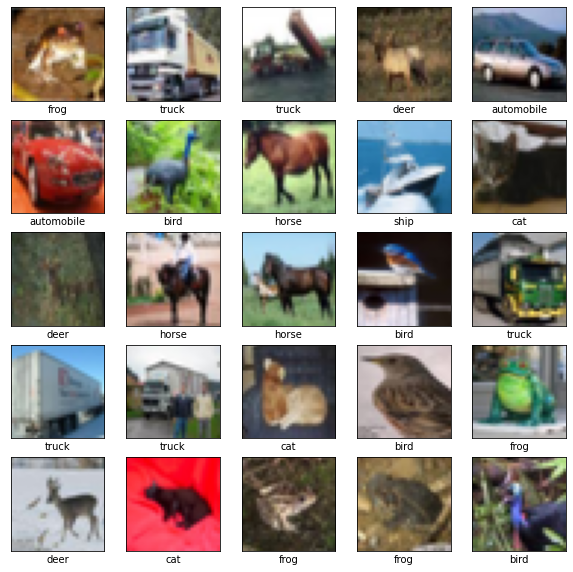

In [18]:
# Sample the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Option 2: Load images as .jpg's with PIL/Pillow

In [21]:
# Uses a built-in keras module (leveraging std urllib) to download the dataset from a remote source
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
print(data_dir)

/home/till/.keras/datasets/flower_photos


In [23]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(f'{image_count=}')

image_count=3670


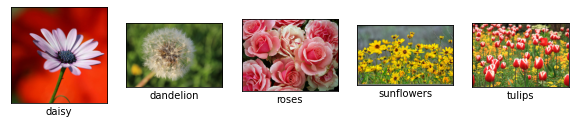

In [40]:
flowers = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

plt.figure(figsize=(10,10))
for i in range(len(flowers)):
    plt.subplot(1, len(flowers), i+1)
    plt.xticks([])
    plt.yticks([])
    image_binary = str(list(data_dir.glob(f'{flowers[i]}/*'))[0])
    plt.imshow(PIL.Image.open(image_binary))
    plt.xlabel(flowers[i])
plt.show()

## Option 3: Load from disk into test/train sets

In [41]:
batch_size = 32
img_height = 180
img_width = 180

In [48]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [49]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [50]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


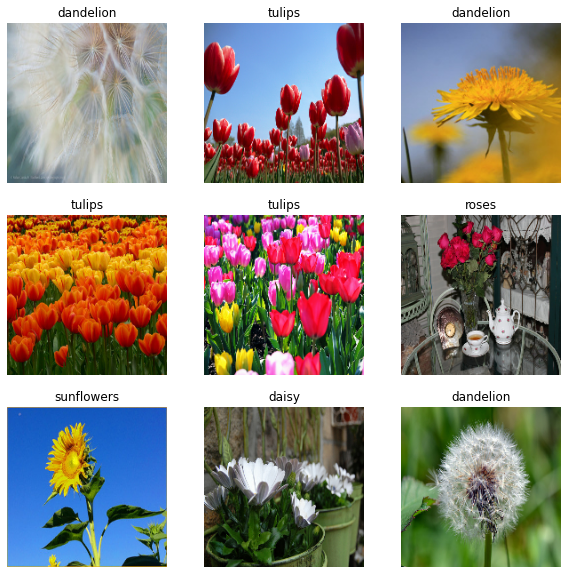

In [59]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")